In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../kdd2004.csv')

In [4]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', 'target'],
      dtype='object')

In [5]:
df.target.value_counts(normalize=True)

target
-1    0.991108
 1    0.008892
Name: proportion, dtype: float64

In [6]:
df.target = df.target.map({-1:0, 1:1})
df.target.unique()

array([0, 1])

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [10]:
X = df.drop(columns='target', axis=1)
X.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73'],
      dtype='object')

In [11]:
y = df.target
y.unique()

array([0, 1])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [13]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((102025, 74), (102025,), (43726, 74), (43726,))

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
lr = LogisticRegression(max_iter=1000, random_state=0)
lr.fit(X_train, y_train)
y_train_lr = lr.predict_proba(X_train)[:,1]
y_test_lr = lr.predict_proba(X_test)[:,1]

/home/max/Udemy/Udemy/machine_learning_imbalanced_data/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
rf = RandomForestClassifier(n_estimators=100, max_depth=2, criterion='entropy', n_jobs=-1, random_state=0)
rf.fit(X_train, y_train)
y_train_rf = rf.predict_proba(X_train)[:,1]
y_test_rf = rf.predict_proba(X_test)[:,1]

# Recall

In [18]:
from sklearn.metrics import recall_score

In [19]:
?recall_score

Signature:
recall_score(
    y_true,
    y_pred,
    *,
    labels=None,
    pos_label=1,
    average='binary',
    sample_weight=None,
    zero_division='warn',
)
Docstring:
Compute the recall.

The recall is the ratio ``tp / (tp + fn)`` where ``tp`` is the number of
true positives and ``fn`` the number of false negatives. The recall is
intuitively the ability of the classifier to find all the positive samples.

The best value is 1 and the worst value is 0.

Support beyond term:`binary` targets is achieved by treating :term:`multiclass`
and :term:`multilabel` data as a collection of binary problems, one for each
label. For the :term:`binary` case, setting `average='binary'` will return
recall for `pos_label`. If `average` is not `'binary'`, `pos_label` is ignored
and recall for both classes are computed then averaged or both returned (when
`average=None`). Similarly, for :term:`multiclass` and :term:`multilabel` targets,
recall for all `labels` are either returned or averaged dependin

In [20]:
y_test_base = pd.Series(np.zeros(len(y_test)))
y_test_base.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
dtype: float64

In [21]:
print(f"""
Test recall baseline: {recall_score(y_test, y_test_base, pos_label=1)}
Test recall rf: {recall_score(y_test, rf.predict(X_test), pos_label=1)}
Test recall lr: {recall_score(y_test, lr.predict(X_test), pos_label=1)}
      """)


Test recall baseline: 0.0
Test recall rf: 0.5753086419753086
Test recall lr: 0.7111111111111111
      


# True Negative Rate

In [22]:
print(f"""
Test TNR baseline: {recall_score(y_test, y_test_base, pos_label=0)}
Test TNR rf: {recall_score(y_test, rf.predict(X_test), pos_label=0)}
Test TNR lr: {recall_score(y_test, lr.predict(X_test), pos_label=0)}
      """)


Test TNR baseline: 1.0
Test TNR rf: 0.9999769165070058
Test TNR lr: 0.9996537476050876
      


# Geometric Mean

In [23]:
import sklearn.metrics

In [24]:
dir(sklearn.metrics)

['ConfusionMatrixDisplay',
 'DetCurveDisplay',
 'DistanceMetric',
 'PrecisionRecallDisplay',
 'PredictionErrorDisplay',
 'RocCurveDisplay',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_classification',
 '_dist_metrics',
 '_pairwise_distances_reduction',
 '_pairwise_fast',
 '_plot',
 '_ranking',
 '_regression',
 '_scorer',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'balanced_accuracy_score',
 'brier_score_loss',
 'calinski_harabasz_score',
 'check_scoring',
 'class_likelihood_ratios',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'd2_absolute_error_score',
 'd2_log_loss_score',
 'd2_pinball_score',
 'd2_tweedie_score',
 'davies_bouldin_score',
 'dcg_score',
 'det_curve',
 'euclidean_distances',
 'explained_variance_sco

In [25]:
import imblearn.metrics

In [26]:
dir(imblearn.metrics)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_classification',
 'classification_report_imbalanced',
 'geometric_mean_score',
 'macro_averaged_mean_absolute_error',
 'make_index_balanced_accuracy',
 'pairwise',
 'sensitivity_score',
 'sensitivity_specificity_support',
 'specificity_score']

In [27]:
from imblearn.metrics import geometric_mean_score

In [28]:
geometric_mean_score(y_test, y_test_base)

np.float64(0.0)

In [29]:
print(f"""
Test geometric mean baseline: {geometric_mean_score(y_test, y_test_base)}
Test geometric mean rf: {geometric_mean_score(y_test, rf.predict(X_test))}
Test geometric mean lr: {geometric_mean_score(y_test, lr.predict(X_test))}
      """)


Test geometric mean baseline: 0.0
Test geometric mean rf: 0.758482275232785
Test geometric mean lr: 0.8431280372433597
      


In [30]:
dir(imblearn.metrics)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_classification',
 'classification_report_imbalanced',
 'geometric_mean_score',
 'macro_averaged_mean_absolute_error',
 'make_index_balanced_accuracy',
 'pairwise',
 'sensitivity_score',
 'sensitivity_specificity_support',
 'specificity_score']

In [31]:
dir(sklearn.metrics)

['ConfusionMatrixDisplay',
 'DetCurveDisplay',
 'DistanceMetric',
 'PrecisionRecallDisplay',
 'PredictionErrorDisplay',
 'RocCurveDisplay',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_classification',
 '_dist_metrics',
 '_pairwise_distances_reduction',
 '_pairwise_fast',
 '_plot',
 '_ranking',
 '_regression',
 '_scorer',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'balanced_accuracy_score',
 'brier_score_loss',
 'calinski_harabasz_score',
 'check_scoring',
 'class_likelihood_ratios',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'd2_absolute_error_score',
 'd2_log_loss_score',
 'd2_pinball_score',
 'd2_tweedie_score',
 'davies_bouldin_score',
 'dcg_score',
 'det_curve',
 'euclidean_distances',
 'explained_variance_sco

# Dominance

In [32]:
def dominance(y_true, y_pred):
    tpr=recall_score(y_true, y_pred, pos_label=1)
    tnr=recall_score(y_true, y_pred, pos_label=0)
    return tpr - tnr

In [34]:
print(f"""
Test Dominance baseline: {dominance(y_test, y_test_base)}
Test Dominance rf: {dominance(y_test, rf.predict(X_test))}
Test Dominance lr: {dominance(y_test, lr.predict(X_test))}
      """)


Test Dominance baseline: -1.0
Test Dominance rf: -0.4246682745316972
Test Dominance lr: -0.2885426364939765
      


# Metrics vs threshold

In [38]:
?geometric_mean_score

Signature:
geometric_mean_score(
    y_true,
    y_pred,
    *,
    labels=None,
    pos_label=1,
    average='multiclass',
    sample_weight=None,
    correction=0.0,
)
Docstring:
Compute the geometric mean.

The geometric mean (G-mean) is the root of the product of class-wise
sensitivity. This measure tries to maximize the accuracy on each of the
classes while keeping these accuracies balanced. For binary classification
G-mean is the squared root of the product of the sensitivity
and specificity. For multi-class problems it is a higher root of the
product of sensitivity for each class.

For compatibility with other imbalance performance measures, G-mean can be
calculated for each class separately on a one-vs-rest basis when
``average != 'multiclass'``.

The best value is 1 and the worst value is 0. Traditionally if at least one
class is unrecognized by the classifier, G-mean resolves to zero. To
alleviate this property, for highly multi-class the sensitivity of
unrecognized classes c

In [39]:
thresholds = np.linspace(0,1,100)

recall_ls = []
tnr_ls = []
dominance_ls = []
geometric_mean_ls = []

probs_lr = lr.predict_proba(X_test)[:,1]

#Calculating Geometric mean based on thresholds
for threshold in thresholds:

    condition = probs_lr >= threshold
    y_test_predict_manual = np.where(condition, 1, 0)

    #Obtain metrics
    recall_ls.append(recall_score(y_test, y_test_predict_manual, pos_label=1))
    tnr_ls.append(recall_score(y_test, y_test_predict_manual, pos_label=0))
    dominance_ls.append(dominance(y_test, y_test_predict_manual))
    geometric_mean_ls.append(geometric_mean_score(y_test, y_test_predict_manual))

In [40]:
recall_ls[:5]

[1.0,
 0.9333333333333333,
 0.9135802469135802,
 0.8938271604938272,
 0.8765432098765432]

In [41]:
tnr_ls[:2]

[0.0, 0.9609196463608873]

In [42]:
dominance_ls[:3]

[1.0, -0.027586313027553988, -0.06629094719551243]

In [43]:
geometric_mean_ls[:5]

[np.float64(0.0),
 np.float64(0.9470260485348304),
 np.float64(0.9461453204755016),
 np.float64(0.9391070863934604),
 np.float64(0.9315264674137222)]

In [47]:
metrics = pd.concat([pd.Series(recall_ls), pd.Series(tnr_ls), pd.Series(dominance_ls), pd.Series(geometric_mean_ls)], axis=1)
metrics.head()

,0,1,2,3
0,1.000000,0.000000,1.000000,0.000000
1,0.933333,0.960920,-0.027586,0.947026
2,0.913580,0.979871,-0.066291,0.946145
3,0.893827,0.986681,-0.092854,0.939107
4,0.876543,0.989959,-0.113415,0.931526


In [49]:
metrics.columns = ['Recall', 'TNR', 'Dominance', 'Geometric Mean']

In [50]:
metrics.head()

,Recall,TNR,Dominance,Geometric Mean
0,1.000000,0.000000,1.000000,0.000000
1,0.933333,0.960920,-0.027586,0.947026
2,0.913580,0.979871,-0.066291,0.946145
3,0.893827,0.986681,-0.092854,0.939107
4,0.876543,0.989959,-0.113415,0.931526


In [52]:
len(metrics), len(thresholds)

(100, 100)

In [53]:
metrics.index = thresholds

In [54]:
metrics.head()

,Recall,TNR,Dominance,Geometric Mean
0.000000,1.000000,0.000000,1.000000,0.000000
0.010101,0.933333,0.960920,-0.027586,0.947026
0.020202,0.913580,0.979871,-0.066291,0.946145
0.030303,0.893827,0.986681,-0.092854,0.939107
0.040404,0.876543,0.989959,-0.113415,0.931526


In [55]:
?metrics.plot

Signature:      metrics.plot(*args, **kwargs)
Type:           PlotAccessor
String form:    <pandas.plotting._core.PlotAccessor object at 0x7f5b286c1d20>
File:           ~/Udemy/Udemy/machine_learning_imbalanced_data/.venv/lib/python3.10/site-packages/pandas/plotting/_core.py
Docstring:     
Make plots of Series or DataFrame.

Uses the backend specified by the
option ``plotting.backend``. By default, matplotlib is used.

Parameters
----------
data : Series or DataFrame
    The object for which the method is called.
x : label or position, default None
    Only used if data is a DataFrame.
y : label, position or list of label, positions, default None
    Allows plotting of one column versus another. Only used if data is a
    DataFrame.
kind : str
    The kind of plot to produce:

    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' :

Text(0.5, 1.0, 'Metrics vs Discriminant Threshold')

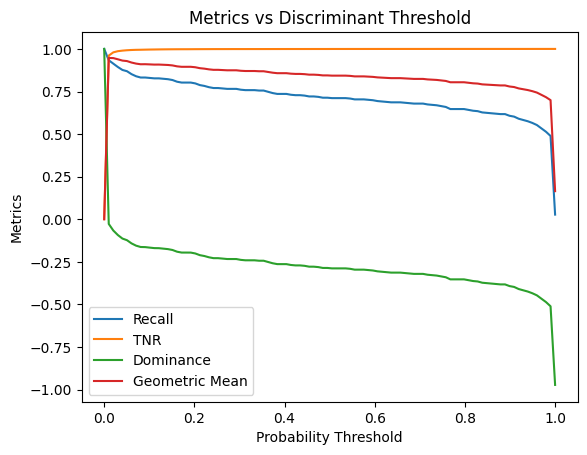

In [57]:
metrics.plot()
plt.xlabel('Probability Threshold')
plt.ylabel('Metrics')
plt.title('Metrics vs Discriminant Threshold')